# 📈 Función de Impulso-Respuesta (IRF): Entendiendo el "Efecto Mariposa"

En los modelos VAR/VARIMA, no solo queremos saber si una variable predice a otra, sino **cuánto tiempo dura el efecto** y **qué tan fuerte es**. La IRF responde a la pregunta: *Si hoy ocurre un choque inesperado (un "impulso") en la variable X, ¿cómo reaccionará la variable Y en los próximos días o meses?*

## 1. 📝 Concepto Teórico para Principiantes

Imagina un estanque de agua en calma (tu sistema de variables en equilibrio). 
* Un **Impulso** es como lanzar una piedra al estanque (un choque repentino en una variable).
* La **Respuesta** es la onda que se expande por el agua (cómo ese choque afecta a las demás variables a través del tiempo).

### ¿Cómo se lee una gráfica de IRF?
En el eje horizontal ($X$) siempre tenemos el **tiempo** (pasos hacia el futuro). En el eje vertical ($Y$) tenemos la **magnitud de la respuesta**. Normalmente verás una línea central rodeada por un área sombreada (los intervalos de confianza).



---

## 2. 📊 Casos Típicos y sus Interpretaciones

Para entender qué está pasando, debemos observar la forma de la curva. Aquí están los 3 casos más comunes:

| Caso Visual | Interpretación Científica | Significado en el Mundo Real |
| :--- | :--- | :--- |
| **Curva que vuelve a Cero rápido** | Efecto Transitorio | El choque es un "susto". La variable se recupera pronto (ej: una noticia falsa que afecta una acción una hora). |
| **Curva que se mantiene lejos de Cero** | Efecto Permanente | El choque cambió el sistema. La variable no vuelve a su estado anterior (ej: un cambio de ley fiscal). |
| **Curva que oscila (Sube y baja)** | Efecto Cíclico / Pendular | El choque genera una reacción excesiva que luego intenta corregirse, creando ondas antes de calmarse. |
| **Línea dentro de la sombra (cero)** | Efecto No Significativo | Estadísticamente, el choque de X no afecta a Y. No hay relación causal real. |

---

## 3. 🐍 Implementación y Visualización en Python

Vamos a generar una gráfica de IRF profesional y aprender a interpretarla paso a paso.



## 📉 Análisis Visual de Impulso-Respuesta


### Cómo interpretar las 4 gráficas resultantes:
1. **X -> X:** Cómo un choque en X se afecta a sí mismo (su persistencia).
2. **X -> Y:** (La más importante) Indica si X realmente "mueve la aguja" en Y.
3. **Y -> X:** Indica si hay retroalimentación (¿Y también afecta a X?).
4. **Y -> Y:** Cómo un choque en Y se disipa en su propia serie.


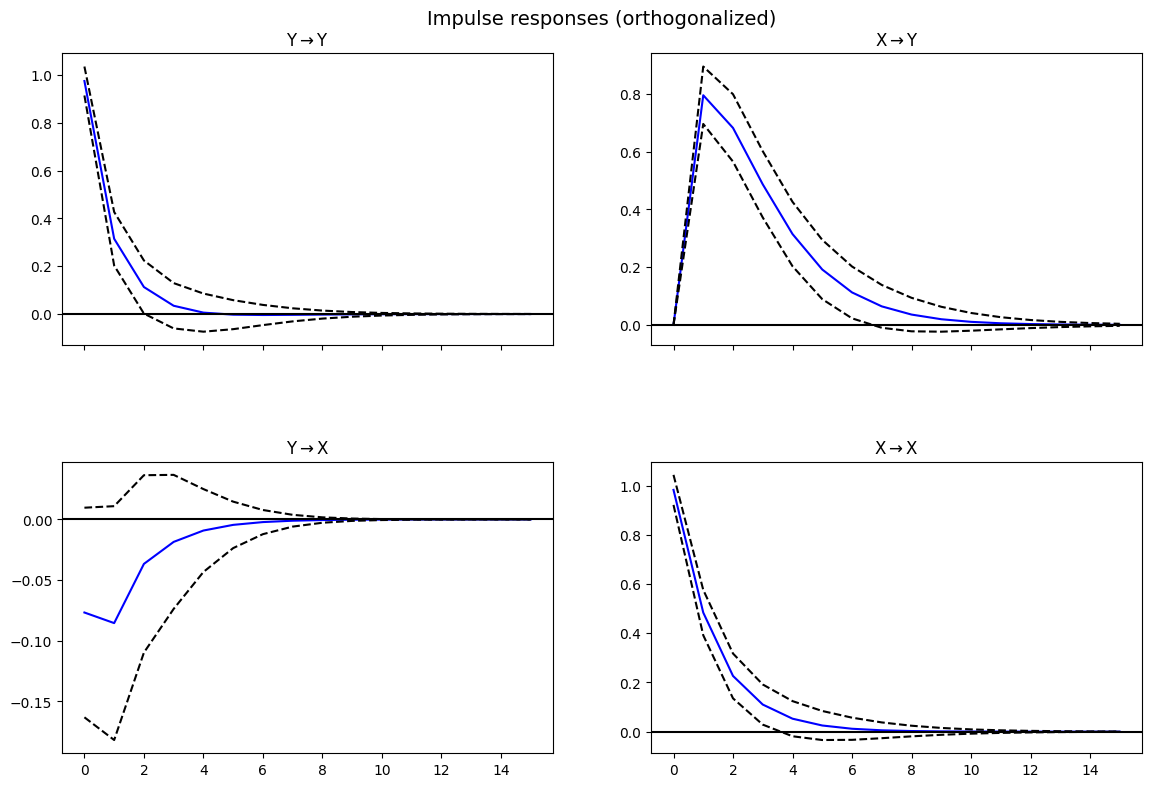

### 📋 Magnitud del Impacto por Periodo (Primeros 5 pasos)

,Y->Y,Y->X,X->Y,X->X
0,0.9757,0.0000,-0.0768,0.9826
1,0.3151,0.7949,-0.0855,0.4839
2,0.1130,0.6819,-0.0367,0.2264
3,0.0345,0.4865,-0.0185,0.1102
4,0.0058,0.3145,-0.0092,0.0527
5,-0.0028,0.1918,-0.0045,0.0250


In [1]:
# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from IPython.display import display, Markdown

# --- 1. Preparación de Datos (Modelo ya conocido) ---
np.random.seed(42)
N = 500
X, Y = np.zeros(N), np.zeros(N)
ruido_x, ruido_y = np.random.normal(0, 1, N), np.random.normal(0, 1, N)

for t in range(1, N):
    X[t] = 0.5 * X[t-1] + ruido_x[t]
    # Y depende fuertemente del valor pasado de X (Causalidad)
    Y[t] = 0.4 * Y[t-1] + 0.8 * X[t-1] + ruido_y[t]

df = pd.DataFrame({'Y': Y, 'X': X})

# Ajustamos el modelo VAR
model = VAR(df)
results = model.fit(2) # Usamos lag 2 para simplicidad

# --- 2. Generación de la IRF ---
# 'periods' es cuántos pasos al futuro queremos ver el impacto
pasos = 15
irf = results.irf(pasos)

# --- 3. Graficación con Interpretación ---
fig = irf.plot(orth=True, figsize=(12, 8)) # orth=True para aislar choques limpios

# Ajustamos el diseño para que sea legible
plt.subplots_adjust(hspace=0.4)
display(Markdown("## 📉 Análisis Visual de Impulso-Respuesta"))
display(Markdown("""
### Cómo interpretar las 4 gráficas resultantes:
1. **X -> X:** Cómo un choque en X se afecta a sí mismo (su persistencia).
2. **X -> Y:** (La más importante) Indica si X realmente "mueve la aguja" en Y.
3. **Y -> X:** Indica si hay retroalimentación (¿Y también afecta a X?).
4. **Y -> Y:** Cómo un choque en Y se disipa en su propia serie.
"""))
plt.show()

# --- 4. Extracción de Datos Numéricos para Precisión ---
# Si quieres saber exactamente cuánto vale el impacto en el paso 3:
impacto_tabla = pd.DataFrame(irf.orth_irfs[:, :, :].reshape(pasos+1, 4), 
                             columns=['Y->Y', 'Y->X', 'X->Y', 'X->X'])

display(Markdown("### 📋 Magnitud del Impacto por Periodo (Primeros 5 pasos)"))
display(impacto_tabla.head(6).style.format("{:.4f}").background_gradient(cmap='Reds'))

## **4. 💡 Tips para tu primer análisis de IRF**

1. **Mira los Intervalos de Confianza:** Si las líneas punteadas (o el área sombreada) cruzan el cero, el efecto ha dejado de ser significativo. No asumas impacto donde hay ruido.

2. **La Ortogonalización (Cholesky):** En el código verás orth=True. Esto es un truco matemático para asegurar que el "choque" que le damos a X no incluya accidentalmente un choque en Y al mismo tiempo. Es el estándar en la industria.

3. **Orden de las variables:** El resultado del IRF puede cambiar ligeramente según el orden en que pongas las columnas en tu DataFrame (df[['Y', 'X']] vs df[['X', 'Y']]). Por convención, pon primero la variable que crees que es la "causa" principal.